In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as mse
import umap

from src.utils_data import load_data
from src.utils_experiment import read_config, write_config
from src.utils_visualization import plot_images, reduce_and_plot, plot_pca_var_ratio

import warnings
warnings.filterwarnings('ignore')

In [2]:
config = read_config('spellman')

In [3]:
X, Y = load_data(config['dataset']['name'])

In [ ]:
reduce_and_plot(X, Y, method='umap', dims=3)

In [ ]:
reduce_and_plot(X, Y, method='pca', dims=3)

23


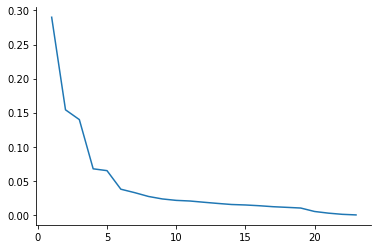

In [6]:
plot_pca_var_ratio(X, n_components=None, cumulative=False)

In [ ]:
nlist = range(2, 20, 2)
mse_train = []
mse_test = []
for n in nlist:
    pca = PCA(n_components=n)
    pca.fit(X)
    mse_train.append(mse(X, pca.inverse_transform(pca.transform(X))))
    mse_test.append(mse(X, pca.inverse_transform(pca.transform(X))))
plt.plot(nlist, mse_train)
plt.plot(nlist, mse_test)
plt.show()